In [1]:
import pandas as pd
import numpy as np

data_base = pd.read_csv('NSL-KDD/KDDTrain+.txt',header=None)


In [2]:
x = data_base.iloc[:,4:-1]
x = x.iloc[:,:-1]
x = x.values
x = x.astype(int)
x

array([[ 491,    0,    0, ...,    0,    0,    0],
       [ 146,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    1,    0,    0],
       ...,
       [2231,  384,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    1,    0,    0],
       [ 151,    0,    0, ...,    0,    0,    0]])

In [3]:
y = np.where(data_base[41] == "normal", 0, 1)
# y = y.iloc[:,-1:]
# y = y.values
y = y.astype(int)
y

array([0, 0, 1, ..., 0, 1, 0])

In [4]:
import torch
from torch import nn

In [5]:

from sklearn import datasets

wine = datasets.load_wine()
data = x
target = y

print(data.shape, target.shape)

(125973, 37) (125973,)


In [6]:
class WineClassifier(nn.Module):

  def __init__(self, input_size, hidden_size, out_size):
    super(WineClassifier, self).__init__()

    self.hidden  = nn.Linear(input_size, hidden_size)
    self.relu    = nn.ReLU()
    self.out     = nn.Linear(hidden_size, out_size)
    self.softmax = nn.Softmax()

  def forward(self, X):
    
    feature = self.relu(self.hidden(X))
    output  = self.softmax(self.out(feature))

    return output

input_size  = data.shape[1]
hidden_size = 32
out_size    = len(y)

net = WineClassifier(input_size, hidden_size, out_size).to('cpu') #cast na GPU 
device = 'cpu'
     

In [7]:

print(net)

WineClassifier(
  (hidden): Linear(in_features=37, out_features=32, bias=True)
  (relu): ReLU()
  (out): Linear(in_features=32, out_features=125973, bias=True)
  (softmax): Softmax(dim=None)
)


In [8]:

Xtns = torch.from_numpy(data).float()
Ytns = torch.from_numpy(target)

# Cast na GPU
Xtns = Xtns.to(device)
Ytns = Ytns.to(device)

print(Xtns.dtype, Ytns.dtype)

torch.float32 torch.int64


In [9]:
pred = net(Xtns)

print(pred.shape, Ytns.shape)
print(pred[0].data, Ytns[0].data)

: 

## Acuracy of the algorithm Decision Tree Model

- Using 50% of the data to test and 50% to train the model

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn import metrics


x_train, x_test,  y_train, y_test = train_test_split(x, y,train_size=0.5)

clf = Perceptron(tol=1e-3, random_state=0)
# clf = tree.DecisionTreeClassifier()
classification = clf.fit(x_train, y_train)
y_pred = classification.predict(x_test)

acuracy = metrics.accuracy_score(y_test,y_pred)
performace = round(acuracy,2)
print(acuracy)


0.22017241653039515


# Confusion matrix

[[ 1636 31983]
 [17151 12217]]


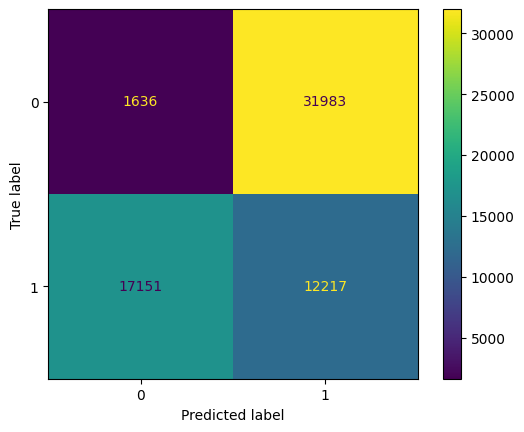

In [ ]:

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


color = 'white'
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=classification.classes_)

print(cm)
disp.plot()
plt.show()

# Recall

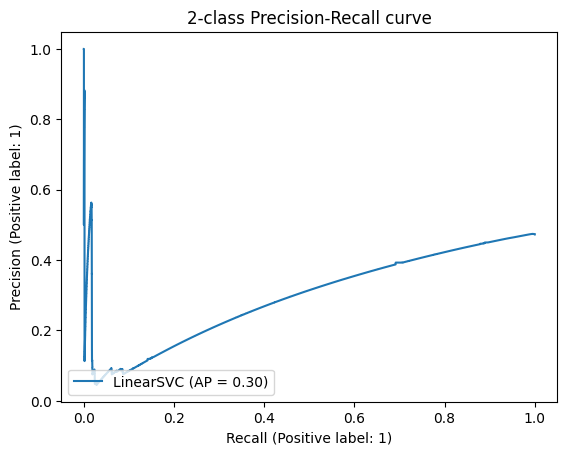

In [ ]:

from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import recall_score

recall = (recall_score(y_test, y_pred, average=None))
display = PrecisionRecallDisplay.from_estimator(
    classification, x_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")


In [ ]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     class 0       0.09      0.05      0.06     33619
     class 1       0.28      0.42      0.33     29368

    accuracy                           0.22     62987
   macro avg       0.18      0.23      0.20     62987
weighted avg       0.18      0.22      0.19     62987

              precision    recall  f1-score   support

           0       0.09      0.05      0.06     33619
           1       0.28      0.42      0.33     29368

    accuracy                           0.22     62987
   macro avg       0.18      0.23      0.20     62987
weighted avg       0.18      0.22      0.19     62987



y_train.shape

for i in range(len(DataBaseTest.index)):
    if DataBaseTest.iloc[i,-2] == 'normal':
        DataBaseTest.iloc[i,-2] = 0
    else:
        DataBaseTest.iloc[i,-2] = 1
DataBaseTest = DataBaseTest.iloc[:,:-1]
DataBaseTest = DataBaseTest.iloc[:,4:].values
DataBaseTest = DataBaseTest.astype(int)
